In [1]:
!pip install pandas seaborn matplotlib plotly

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load the dataset
data = pd.read_csv('data.csv')


In [4]:
# View the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

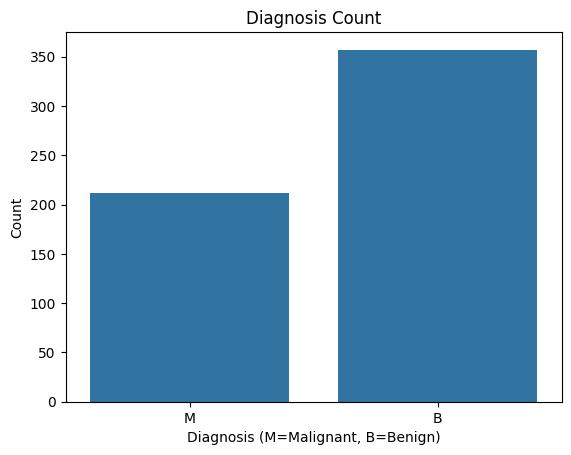

In [6]:
# Count plot for a categorical feature
sns.countplot(data=data, x='diagnosis')
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis (M=Malignant, B=Benign)')
plt.ylabel('Count')
plt.show()


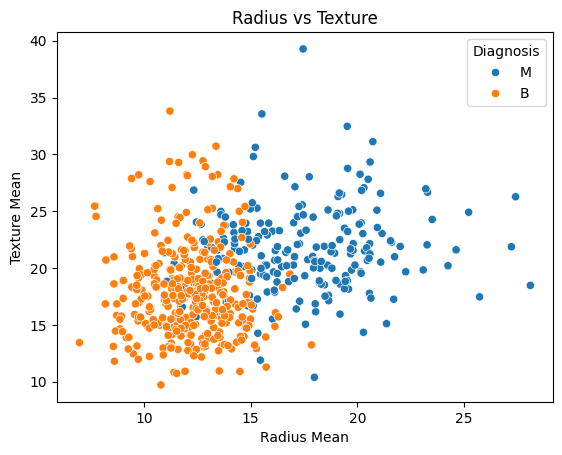

In [7]:
# Scatter plot for two numerical features
sns.scatterplot(data=data, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Radius vs Texture')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()


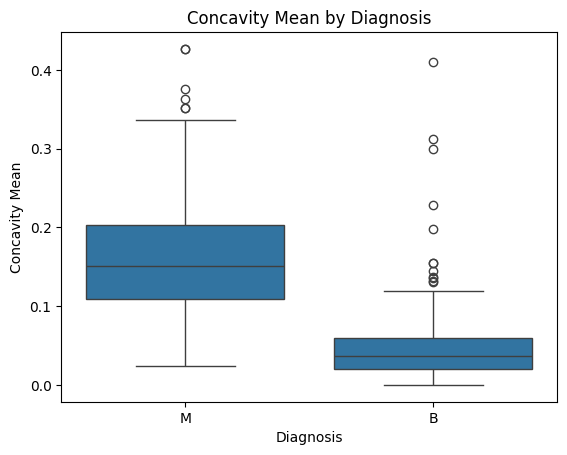

In [8]:
# Box plot to compare distributions
sns.boxplot(data=data, x='diagnosis', y='concavity_mean')
plt.title('Concavity Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Concavity Mean')
plt.show()


In [10]:
fig = px.scatter(data, x='radius_mean', y='texture_mean', color='diagnosis',
                 title='Interactive Radius vs Texture',
                 labels={'radius_mean': 'Radius Mean', 'texture_mean': 'Texture Mean'})
fig.show()


In [11]:
fig = px.box(data, x='diagnosis', y='concavity_mean', points='all',
             title='Interactive Concavity Mean by Diagnosis')
fig.show()


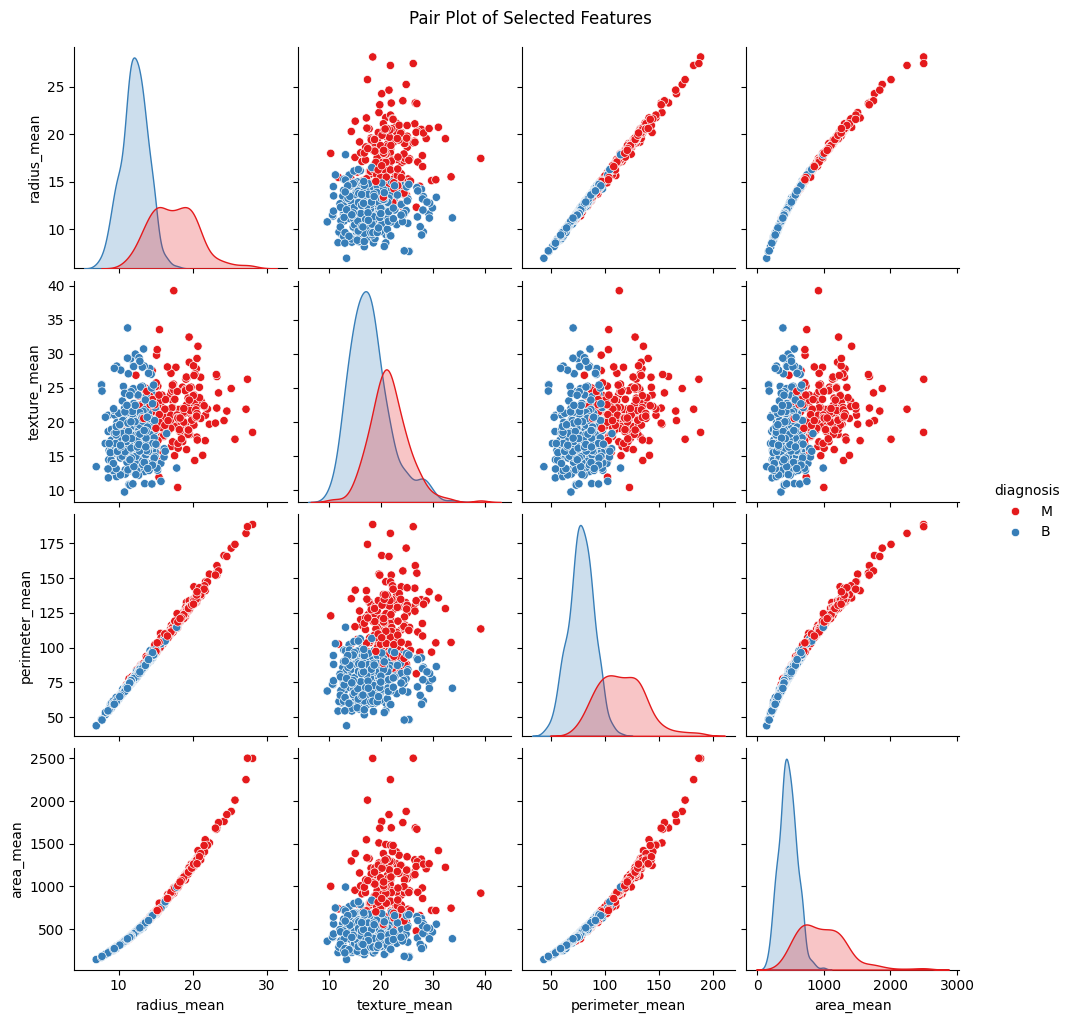

In [12]:
# Pair plot for a subset of features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
sns.pairplot(data, vars=features, hue='diagnosis', palette='Set1')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


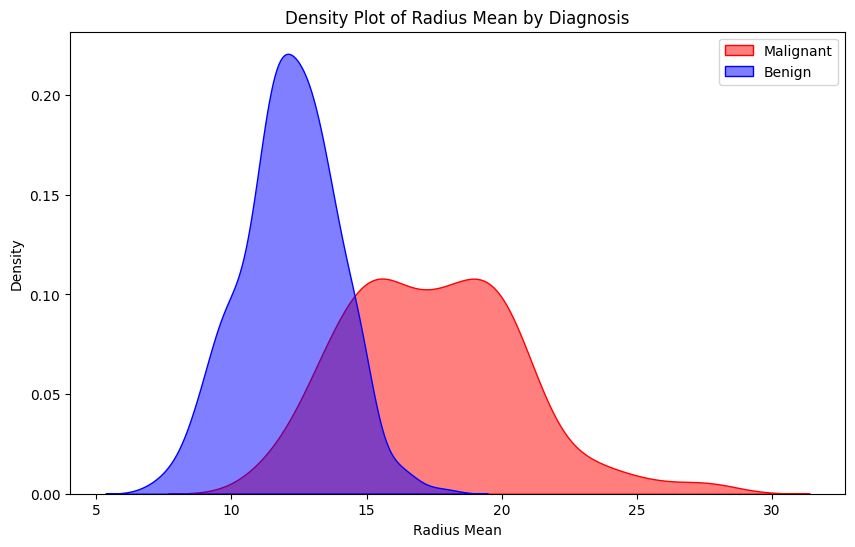

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['diagnosis'] == 'M']['radius_mean'], label='Malignant', fill=True, color='red', alpha=0.5)
sns.kdeplot(data[data['diagnosis'] == 'B']['radius_mean'], label='Benign', fill=True, color='blue', alpha=0.5)
plt.title('Density Plot of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.legend()
plt.show()


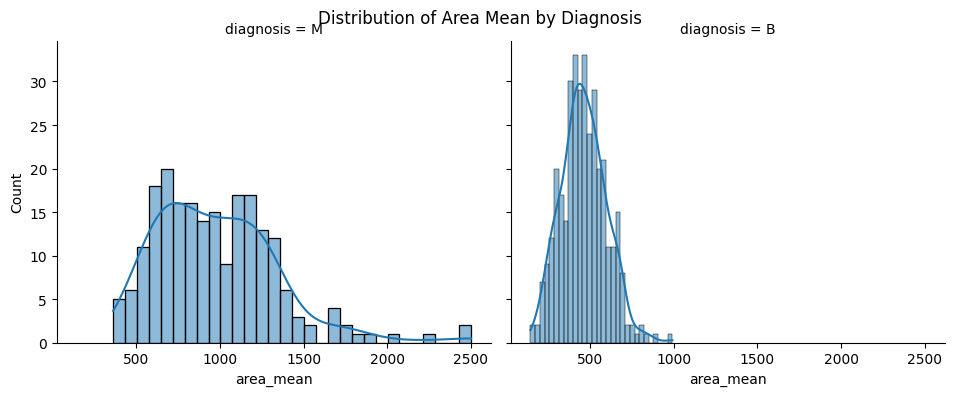

In [18]:
g = sns.FacetGrid(data, col="diagnosis", height=4, aspect=1.2)
g.map(sns.histplot, "area_mean", bins=30, kde=True)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Area Mean by Diagnosis')
plt.show()



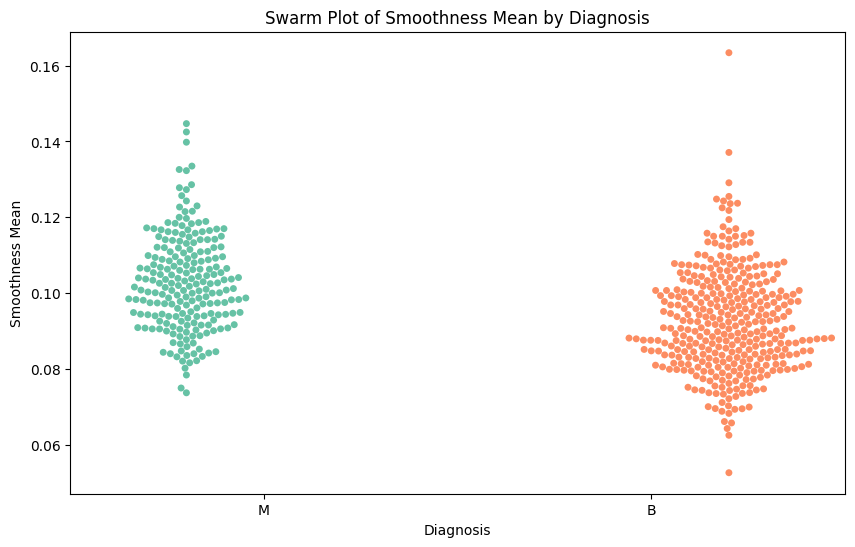

In [21]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='diagnosis', y='smoothness_mean', hue='diagnosis', palette='Set2', dodge=True)
plt.title('Swarm Plot of Smoothness Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Smoothness Mean')
plt.show()


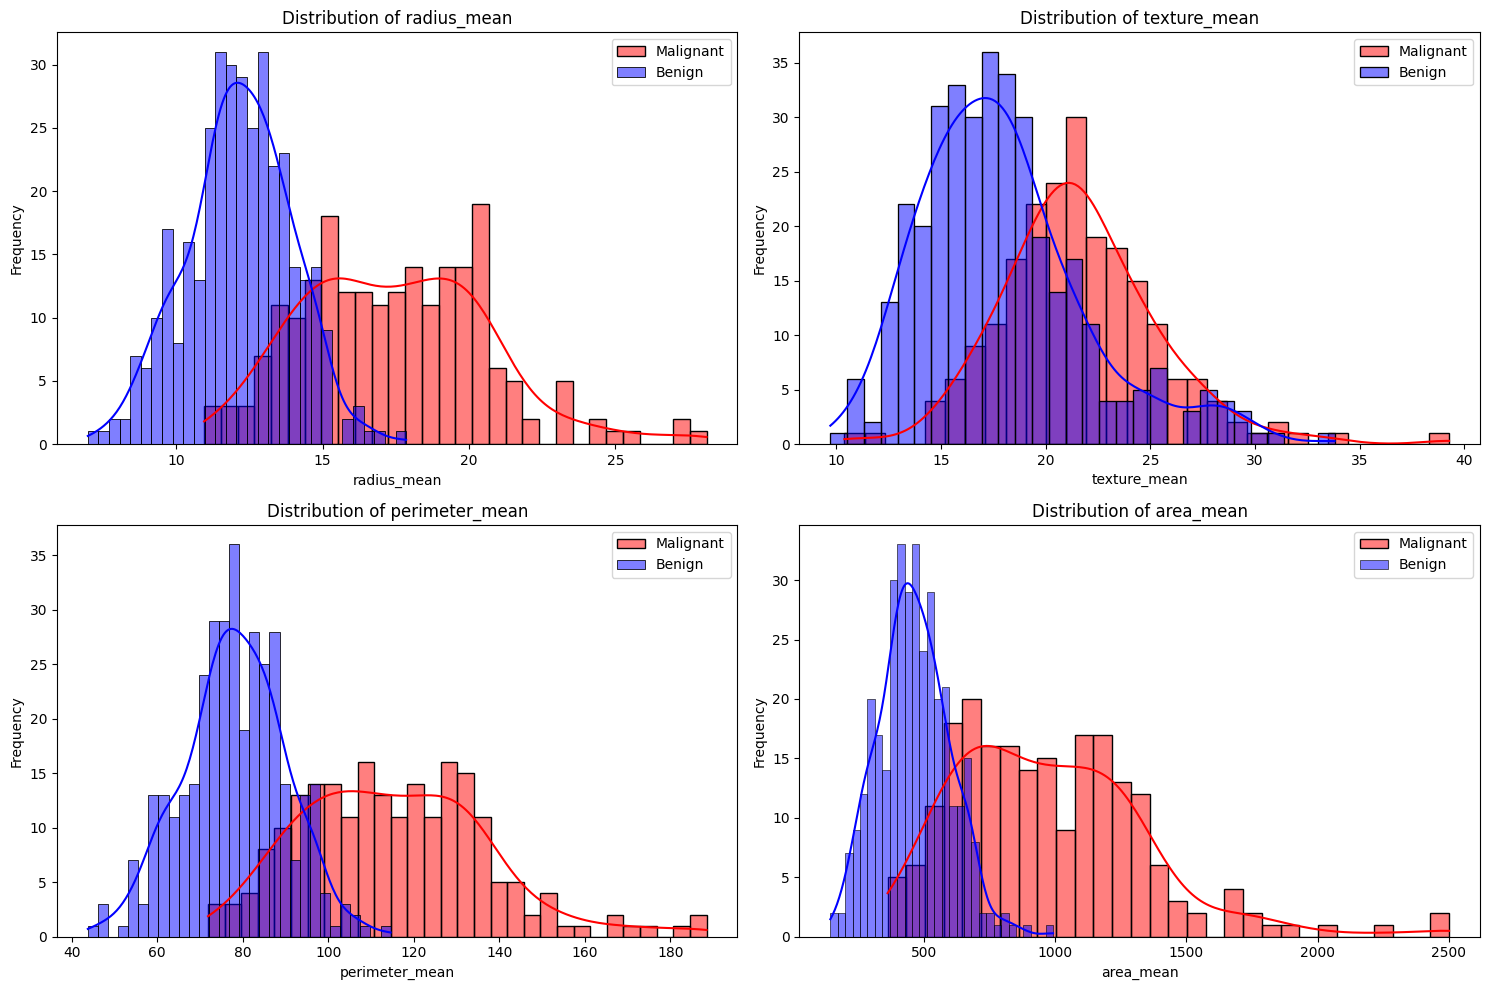

In [22]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature][data['diagnosis'] == 'M'], color='red', label='Malignant', kde=True, bins=30)
    sns.histplot(data[feature][data['diagnosis'] == 'B'], color='blue', label='Benign', kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-23-ddfca773186f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




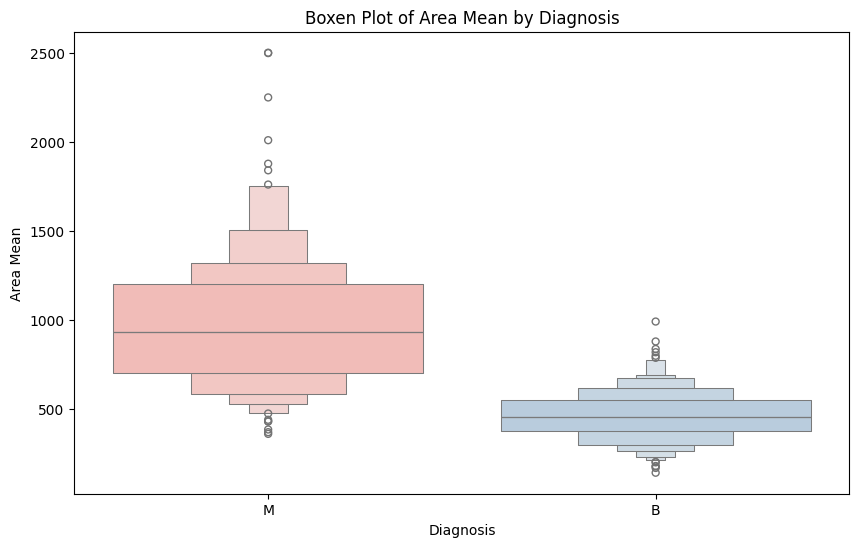

In [23]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data, x='diagnosis', y='area_mean', palette='Pastel1')
plt.title('Boxen Plot of Area Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.show()


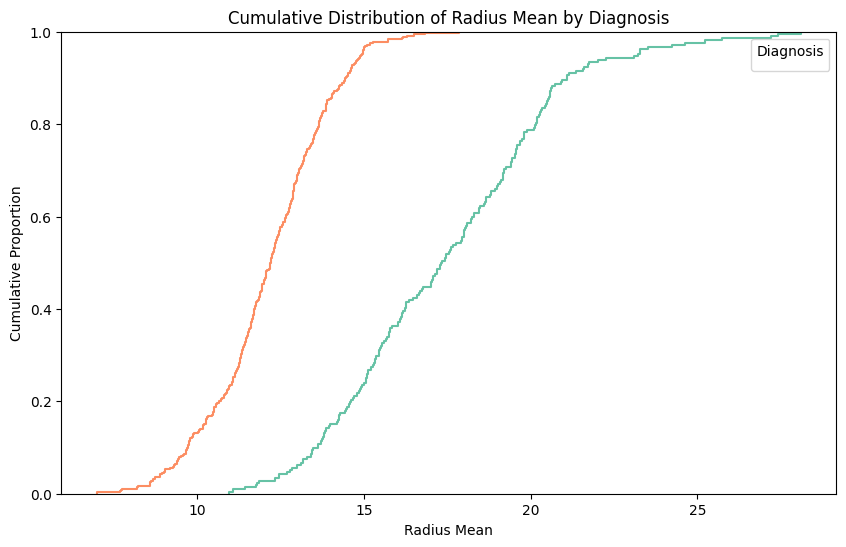

In [24]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=data, x='radius_mean', hue='diagnosis', stat='proportion', palette='Set2')
plt.title('Cumulative Distribution of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Cumulative Proportion')
plt.legend(title='Diagnosis')
plt.show()



In [26]:
import plotly.express as px

fig = px.scatter(data, x='radius_mean', y='texture_mean', color='diagnosis',
                 marginal_x='histogram', marginal_y='histogram',
                 title='Interactive Scatter Plot with Marginal Histograms',
                 labels={'radius_mean': 'Radius Mean', 'texture_mean': 'Texture Mean'})
fig.show()


In [28]:
fig = px.box(data, x='diagnosis', y='smoothness_mean',
             title='Box Plot of Smoothness Mean by Diagnosis',
             labels={'smoothness_mean': 'Smoothness Mean'})
fig.show()



In [31]:
fig = px.histogram(data, x='area_mean', color='diagnosis',
                   histnorm='density',
                   title='Histogram of Area Mean with Density Curve',
                   marginal='box')
fig.show()




In [32]:
fig = px.ecdf(data, x='radius_mean', color='diagnosis',
               title='Cumulative Distribution Function of Radius Mean by Diagnosis')
fig.show()


In [33]:
fig = px.area(data, x='smoothness_mean', color='diagnosis',
               title='Area Plot of Smoothness Mean by Diagnosis',
               labels={'smoothness_mean': 'Smoothness Mean'})
fig.show()


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the diagnosis
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split the data
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.set_index('Feature')

fig = px.imshow(importance_df.T,
                title='Feature Importance from Random Forest',
                color_continuous_scale='Inferno',
                labels=dict(x="Features", y="Importance"),
                x=importance_df.index)

fig.show()



In [37]:
import seaborn as sns
import numpy as np

# Create a pairwise correlation matrix
pairwise_corr = data.corr()

fig = px.imshow(pairwise_corr,
                title='Pairwise Feature Correlation Heatmap',
                color_continuous_scale='Blues',
                labels=dict(x="Features", y="Features"),
                x=pairwise_corr.columns,
                y=pairwise_corr.columns)

fig.show()
